In [1]:
import copy
import glob
import matplotlib.pyplot as plt
import numpy as np
import os

import PIL

import torch
import torch.utils
import torchvision
import torchvision.io


shuffle = (
    'MT19937',
    np.linspace(0, 1e15, 624, dtype=np.uint32),
    623,
    0,
    0.0
)


In [2]:
class Frames(torch.utils.data.Dataset):
    def __init__(self, img_dir='./train/**/*.bmp', transform=torchvision.transforms.ToTensor(), target_transform=None):
        self.transform = transform
        self.target_transform = target_transform
        
        def _getLabels(fname):
            return 1. if 'anime' in fname else 0.
        getLabels = np.vectorize(_getLabels)
        
        f = np.array(glob.glob(img_dir, recursive=True))
        f_labels = getLabels(f)
        
        # I don't know if PyTorch uses np.random, but I'll save its state
        # and restore it after shuffling, just in case.  (All this is to
        # have *reproduceably* shuffled frames.)
        rstate = np.random.get_state()
        np.random.set_state(shuffle)
        shuffle_idx = np.random.permutation(len(f))
        np.random.set_state(rstate)
        
        self.images = f[shuffle_idx]
        self.labels = f_labels[shuffle_idx]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = PIL.Image.open(self.images[idx])
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        return image, label


img   249680	 shape torch.Size([3, 128, 128]) 	 type anime
img   222816	 shape torch.Size([3, 128, 128]) 	 type anime
img   194594	 shape torch.Size([3, 128, 128]) 	 type photo
img    17182	 shape torch.Size([3, 128, 128]) 	 type anime


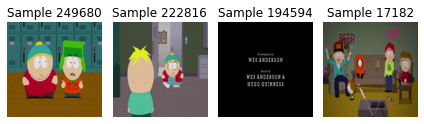

img   158394	 shape torch.Size([3, 128, 128]) 	 type photo
img   271732	 shape torch.Size([3, 128, 128]) 	 type photo
img   301389	 shape torch.Size([3, 128, 128]) 	 type photo
img   117635	 shape torch.Size([3, 128, 128]) 	 type photo


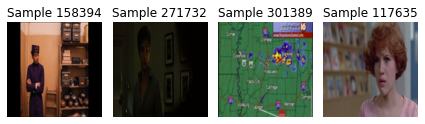

img    44217	 shape torch.Size([3, 128, 128]) 	 type photo
img   129770	 shape torch.Size([3, 128, 128]) 	 type photo
img   144468	 shape torch.Size([3, 128, 128]) 	 type photo
img   189947	 shape torch.Size([3, 128, 128]) 	 type anime


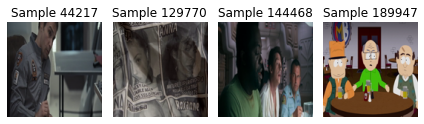

img   211726	 shape torch.Size([3, 128, 128]) 	 type anime
img   280751	 shape torch.Size([3, 128, 128]) 	 type anime
img   320227	 shape torch.Size([3, 128, 128]) 	 type photo
img   268889	 shape torch.Size([3, 128, 128]) 	 type anime


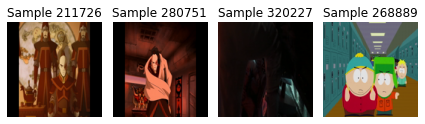

In [11]:
dataset = Frames()

def showRandom():
    fig = plt.figure()
    for i, imgidx in enumerate(np.random.randint(0, len(dataset), 4)):
        image, label = dataset[imgidx]
        print(f'img {imgidx:8d}\t', f'shape {str(image.shape):26s}\t', 'type', 'anime' if label == 1 else 'photo')

        ax = plt.subplot(1, 4, i + 1)
        ax.imshow(torchvision.transforms.ToPILImage()(image))
        ax.set_title(f'Sample {imgidx}')
        ax.axis('off')

        plt.tight_layout()

    plt.show()

for _ in range(4):
    showRandom()


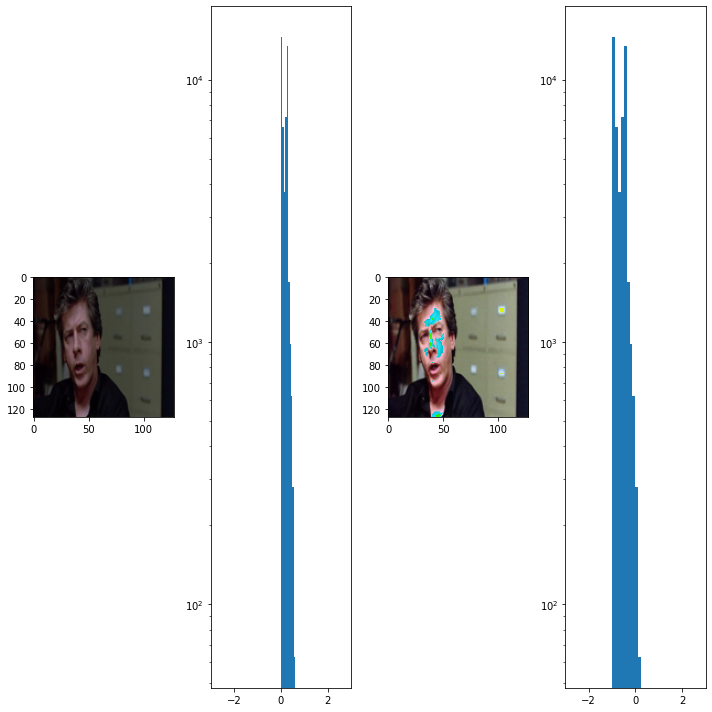

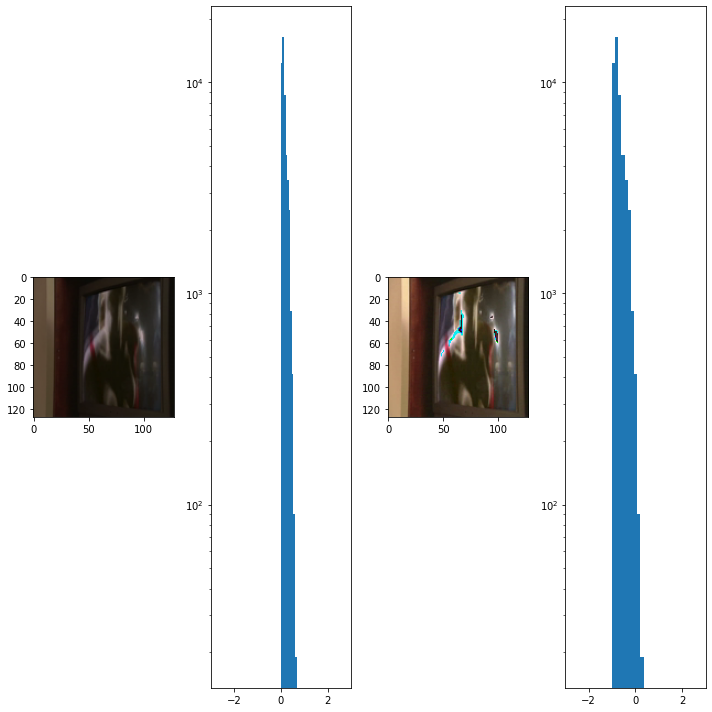

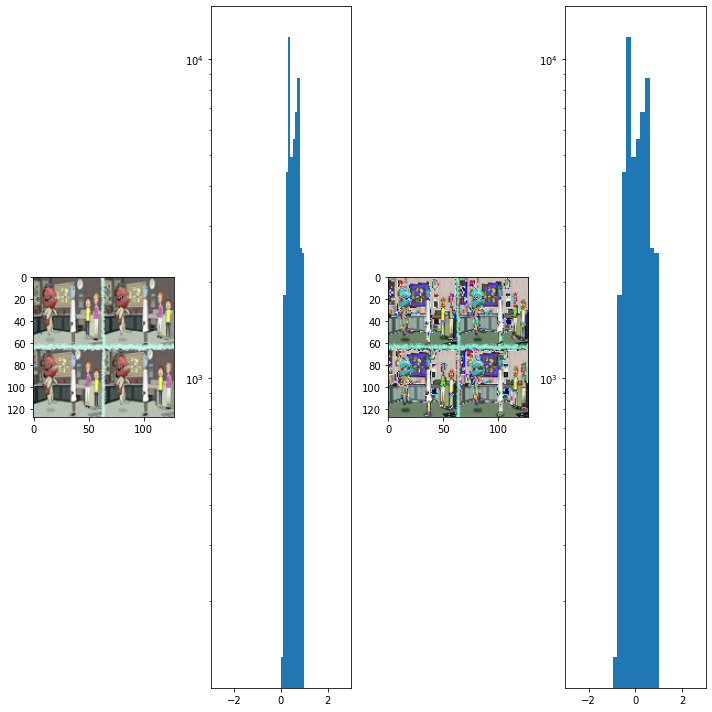

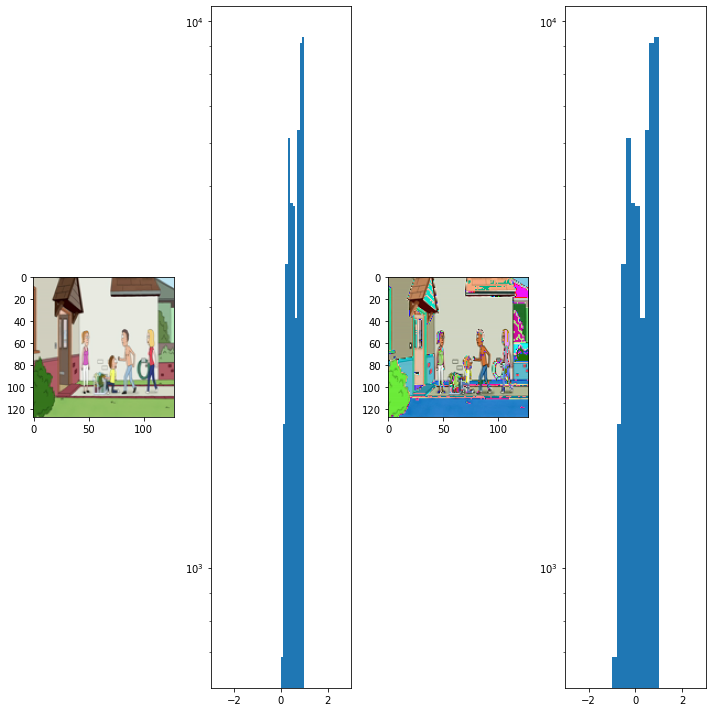

In [60]:
FIGSIZE = 10
XLIM = 3

for _ in range(4):
    randomimg, randomlabel = dataset[np.random.randint(0, len(dataset))]

    fig, (ax1, ax4, ax2, ax3) = plt.subplots(1, 4, figsize=(FIGSIZE, FIGSIZE))

    # imgtransformed = randomimg
    # imgtransformed = torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(randomimg)
    # imgtransformed = torchvision.transforms.Normalize([0.] * 3, [1.] * 3)(randomimg)
    imgtransformed = torchvision.transforms.Normalize([0.5] * 3, [0.5] * 3)(randomimg)

    ax1.imshow(torchvision.transforms.ToPILImage()(randomimg))
    ax4.hist(randomimg.numpy().flatten())
    ax4.set_yscale('log')
    ax4.set_xlim((-1 * XLIM, XLIM))

    ax2.imshow(torchvision.transforms.ToPILImage()(imgtransformed))
    ax3.hist(imgtransformed.numpy().flatten())
    ax3.set_yscale('log')
    ax3.set_xlim((-1 * XLIM, XLIM))

    plt.tight_layout()

    plt.show()


In [ ]:
# Next up: data transformations:
# https://pytorch.org/tutorials/recipes/recipes/custom_dataset_transforms_loader.html#part-2-data-tranformations
